<img src="resources/BerkeleySeal.png" width="150"/> <img src="resources/berkeleyischool-logo-blue.png" width="600"/>

# <center> Final project for course W261 - Machine Learning in Scale - Spring 2019</center>

### __Team 13:__ Clayton Leach, James Kajdasz,  Marcelo Queiroz, Peter Trenkwalder, Vishal Agarwal.

## Introduction:

Online advertising is a growing industry whose revenues reached 83 billion dollars in 2017, a 14% growth from 2016. Final users, however, view online advertisement as an unwanted distraction, with little to no benefits to their browsing experience, which led to widespread use of ad-blockers, stressing the model of "free" content generation on the internet. 

For that reason, improving advertisement techniques is an active research field, trying to improve both user and seller experience and profits. From a user perspective, it would be better to see only adds that are related to his/her interests, avoiding distractions that are "useless". From the seller perspective, posting the adds in better places and for interested users means more sales with less advertisement, in other words, more efficiency. This kind of targeting is what we call Click-Through-Rate analisys and, for a better understanding, we add two examples bellow:

__Example 1:__
In display advertising, content providers are often charged per thousand impressions (CPM), as opposed to sponsored search and product listing ads which generally charge on a per click basis (Chapelle et al., 2014).  As such, there is significant uncertainty from the viewpoint of a purchaser as to whether their marketing spend will produce results.  For instance, they might pay 10 dollars per 1000 impressions, (a cent per impression), but receive a single click, for an effective cost per click (CPC) of 10 dollars.  For most advertisers this would be unacceptable and they would cancel their contract.  As such, it is in the interest of an entity serving ads to find a balance between serving ads which pay the most, and serving ads to the correct individuals such that returns for their clients are acceptable.  The best way to manage these sometimes competing priorities is to be able to effectively predict the likelihood of a click conditional on a specific ad being displayed.  In this fashion a company is able to approach serving ads as an optimization problem, where the goal is to maximize revenue constrained by the fact that marketers will churn either due to poor performance, or lack of activity.  A company could also elect to forego the revenue maximization route, and instead target growth by appealing to users; in this framework a company serving ads would look to serve ads which are most relevant, which could be proxied as those most likely to be clicked.  This sentiment is captured by researchers at Facebook: “Machine learning plays a central role in computing the expected utility of a candidate ad to a user, and in this way increases the efficiency of the marketplace” (He et al., 2014).  And the utility of this task becomes even more important under a cost per click scheme, such as what Facebook uses.  In this framework the value of showing an ad can be predicted directly, as CPC * P(click|ad), where P(click|ad) is predicted using machine learning.


__Example 2:__
While CTR analysis is extremely useful from the perspective of a company serving ads, it is also useful from the perspective of a company purchasing ads.  For instance, if a company can understand the behavioral characteristics of the individual most likely to click on their ad, they can gain valuable insight into their customers.  And there is value on the opposite side of the spectrum as well: understanding the characteristics of a user who is least likely to click on an ad can help inform decisions made with regards to other marketing channels (E.g. if we know users who demonstrate quality x don’t click, then we should avoid T.V/Radio/Magazines/etc. who appeal to a market with a high propensity for quality x).


This work uses data from [Criteo](https://www.criteo.com/) on online advertisement and was first posted in a Kaggle competition in 2015. The goal is to use the information about adds presented during 7 days to web users and labeled as a success (add was clicked) or a fail (add was not clicked). We will train a model based on a Binary Logistic Regression algorithm to predict an add success probability that could be embedded in a platform and used to show add that are more interesting to the final user.



## 1. Question Formulation

The dataset we are provided consists of 13 integer valued features, 26 categorical features, and a boolean indicator for whether the ad was clicked. Also important to note that we are not provided the meaning of any of the features, so no semantic knowledge or domain expertise can be used. Our analysis of the this data seeks to answer the following:

* Based on the given data, how accurate can we predict click-through-rate (CTR)?

* What are the distributions for our target variable and integer valued features?  Are there any anomalous values, or significant missing values?  

* Are there variables which are strongly correlated with the target variable, or with each other?

* What are the most influential features/variables in predicting whether a click will happen?

* Are there approaches we can take to manage the dimension of our data?


## 2. Algorithm Explanation

### 2.1 Overview of Logistic Regression
Our group will apply a logistic regression model to the problem. We chose logistic regression because it is a very common and widely used algorithm, and the results of a logistic regression are relatively easy to communicate and interpret. Logistic regression is a classification algorithm that uses predictor variables (continuous or categorical) to classify an outcome variable into one of two categories. The categories are arbitrarily given labels of '0' or '1', but can apply to any decision with two possible outcomes: cancerous/non-cancerous, spam/not-spam, fraudulent/legitimate... Logistic regression can be applied to a problem with more than two categories as well by creating a separate equation for each category: A/not A, B/not B, C/not C... The outcome variable is a probability (ranging 0 to 1) of group membership. The classification with the highest probability is the predicted category label.

### 2.2 Logistic Regression Equation
Logistic regression aggregates the predictor variables similar to what is done in a standard linear regression. Each input $X_j$ is multiplied times a weight $\beta_j$ and each input/weight product $X_j \beta_j$ is added together. Or, in the summarised form:  

$$\displaystyle f(X)= \beta_0 + \Sigma_{j=1}^p X_j \beta_j$$

In matrix algebra form, this can be written as $\displaystyle f(X)= \theta^TX$, where $\theta$ is a vector of weights (including $\beta_0$), and $X$ is a vector of inputs (with an input of 0 for $\beta_0$). The modification that logistic regression makes is to then embed the output of $\theta^TX$ in a new funtion $g(z)$ where $\displaystyle g(z)=\frac{1}{1+e^{-z}}$. To put all this together, $h_\theta (x) = g(\theta^Tx)$ where $g(z)=\frac{1}{1+e^{-z}}$. The function $g(z)$ is the sigmoid function, and it has the beneficial property of scaling all outputs between values of 0 and 1. We can write the equations above even more succinctly by substituting in $\theta^TX$ for $z$. Our final simplified equation is then: 

$$\displaystyle h_\theta (x) = \frac{1}{1+e^{-\theta^TX}}$$ 

We treat the value $h_\theta(x)$ as our estimate of probability that x is a member of category $y=1$. The probability that $y=0$ will then be $1 - h_\theta(x)$. Both probabilities will add to one. Recall that $h_\theta(x)$ ranges from 0 to 1 thanks to our application of the sigmoid function.       

### 2.3 Cost Function
The weights of a logistic regression equation can vary, and so there must be a way to compare one hypothetical set of weights to another to judge if one model fits the data better than another. This is done by calculating the overall error of the model when attempting to predict $y$ to summarize model fit. The function that computes the error of the model is known as the cost or loss function. The goal of a model is to fit the data in such a way as to minimize the cost function. For a given set of weights $\theta$ attempting to predict a label $y_i$, the cost function of $h_\theta(X)$ can be quantified by simply squaring the errors where cost is $Cost \displaystyle (h_\theta (x_i), y_i) = \frac{1}{2} (h_\theta(X_i)-y_i)^2$. This is the standard cost function (known as squared loss) for linear regression. For logistic regression, however, the squared loss function is not convex and has many local minima. Another alternative for the cost function must, therefore, be used. Alternatives include hinge loss and logistic loss. The logistic loss function is used by Apache Spark, according to the [documentation](https://spark.apache.org/docs/latest/mllib-linear-methods.html#logistic-regression). For logistic loss (log loss for short), we will take the negative log of the logistic regression output when the actual value of $y$ is 1. When the actual value of $y$ is 0, we will take the negative log of 1 minus the logistic regression output. Written mathematically: $\displaystyle Cost(h_\theta(x),y)= \begin{cases} -log(h_\theta(X)) & y=1\\-log(1-h_\theta(X)) & y=0\end{cases}$ The log loss function has some nice properties. When the logistic regression correctly predicts that $\hat{y}=1$ with a probability of 1, then $-log(1)=0$ and the loss function is zero, reflecting a perfect prediction. Similarly, if we (correctly) predict that $\hat{y}:0$ with a probability of 1, the cost function will be $-log(1-1)=0$. If however we make an incorrect prediction that $P(\hat{y}:0)=.999$, (and the corresponding probability $P(\hat{y}:1)=.001$) when in actuality $y=1$, then the log loss function will be $-log(.001)\approx3$, reflecting a higher amount of error. Note that we can't take the log of 0, so instead, we use values of .999 and .001. As the correct prediction approaches a probability of 0, the log loss function will approach infinity. the prediction is $y=0$     

### 2.4 Finding the Correct Model
One could select logistic regression weights at random, and see if the new model is an improvement over the last model by evaluating the loss function, and continue iterating. This is inefficient however and there is no guarantee we'd ever stumble across the best model by chance. It's better to have an algorithm that systematically moves us to better and better models. There are many different algorithms to choose from. When dealing with data at scale, consideration of algorithm will also need to take into account the number of iterations required and how fast an algorithm will converge. For working with data at scale, the Apache Spark [documentation](https://spark.apache.org/docs/latest/mllib-optimization.html#choosing-an-optimization-method) recommends the Limited-memory Broyden-Fletcher-Golfarb-Shanno algorithm (L-BFGS for short).

### 2.5 Toy Implementation
In order to illustrate the concepts mentioned in this section, we will implement a Bynary Logistic Regression model using mini-batches gradient descent from scratch, so the steps are clear. For that purpose we created a small dataset with 4 numerical, 2 categorical features and the labels, of course.

In [37]:
# loading the data
# setting schema and reading in pre-processed data to pyspark dataframe
intFeatures = ['intFeature1','intFeature2','intFeature3','intFeature4']
catFeatures = ['catFeature5','catFeature6']
outcomeField = [StructField("click", IntegerType(), True)]
quantFields = [StructField(f, DoubleType(), True) for f in intFeatures]
qualFields = [StructField(f, StringType(), True) for f in catFeatures]
schema = StructType(outcomeField + quantFields + qualFields)

toyDf = spark.read \
    .schema(schema) \
    .format("csv") \
    .option("header", "true") \
    .load("gs://w261_final-project_team13/toySample/*.csv")

In [38]:
toyDf.show(20)

+-----+-------------------+--------------------+--------------------+--------------------+-----------+-----------+
|click|        intFeature1|         intFeature2|         intFeature3|         intFeature4|catFeature5|catFeature6|
+-----+-------------------+--------------------+--------------------+--------------------+-----------+-----------+
|    0|0.38044728201922134|  1.0461280017194063|  0.8317161330745142|  0.3659735546106383|   25c83c98|   6f6d9be8|
|    1|0.38044728201922134| -1.2072044937875812| -1.0969510532590658|  -0.808690496702659|   25c83c98|   7e0ccccf|
|    0|0.38044728201922134| -1.2072044937875812|  1.7753909926499136|  0.3659735546106383|   25c83c98|   fbad5c96|
|    0|-1.3933721049834424| -1.2072044937875812|  1.9415838693847296|   1.681697323928138|   25c83c98|   7e0ccccf|
|    1|-1.3933721049834424| -1.2072044937875812|  1.1861284542225656|   1.681697323928138|   384874ce|   7e0ccccf|
|    1|-0.5064624114821106| -1.2072044937875812|  0.7709669997151446|0.021438776

Note that the data was previously processed for this demonstrations. The process we followed to process the full dataset will be explained shortly.

Now, as our purpose here is to work with the Logistic Regression and the Gradient Descent of the loss function, let's use PySpark ML API and its one-hot-encoder:

In [41]:
def OneHotEncoder(dataframe,columns):
    '''takes a dataframe and corresponding list of columns
    to one-hot encode'''
    for c in columns:
        # collect unique levels in category
        levels = dataframe.select(c).distinct().rdd.flatMap(lambda x: x).collect()
        # generate dummy variables and associated values
        dummy_vals = [functions.when(functions.col(c) == level, 1).otherwise(0).alias("encoded_" + level) for level in levels]
        # update dataframe with new dummy columns (indicator features)
        
        dataframe = dataframe.select('*',*dummy_vals)
    # drop unencoded categorical columns from dataframe    
    dataframe = dataframe.drop(*columns)
    return dataframe 

In [42]:
# encode all categorical columns
categories = [c for c in toyDf.columns if 'cat' in c]
toy_df_encoded = OneHotEncoder(toyDf,categories)
print('there are now ' + str(len(toy_df_encoded.columns)) + ' columns')

there are now 42 columns


Now our categorical feature levels are encoded features, but if we take a look on them, we will see that our dataset now is very sparse, and therefore, linear algorithms like Logistic Regression will be sensitive to this dataset.

In [43]:
# Let's take a look on some of the encoded features
toy_df_encoded.select('encoded_65be028e',
                      'encoded_2c6b8ded',
                      'encoded_89ff5705',
                      'encoded_3a136cf2',
                      'encoded_43b19349',
                      'encoded_afcf7897',).show(5)

+----------------+----------------+----------------+----------------+----------------+----------------+
|encoded_65be028e|encoded_2c6b8ded|encoded_89ff5705|encoded_3a136cf2|encoded_43b19349|encoded_afcf7897|
+----------------+----------------+----------------+----------------+----------------+----------------+
|               0|               0|               0|               0|               0|               0|
|               0|               0|               0|               0|               0|               0|
|               0|               0|               0|               0|               0|               0|
|               0|               0|               0|               0|               0|               0|
|               0|               0|               0|               0|               0|               0|
+----------------+----------------+----------------+----------------+----------------+----------------+
only showing top 5 rows



There are a few techniques that we can (and will) apply to solve this problem, but for now, we will work with the data as it is. Let's convert the dataframe to RDD so we can have more control of user defined functions without losing too much performance. After that we will define a LogLoss function that will be the one that we want to optimize:

In [44]:
# convert dataframe to RDD
toyRDD = toy_df_encoded.rdd.map(lambda x: (x[0],x[1:])).cache()

In [45]:
# setting coefficient of the "bias" as the mean click rate
meanClick = toyRDD.map(lambda x: (x[0])).mean()
feature_cols = len(toyRDD.take(1)[0][1])
coefs = np.array([meanClick] + [0.0]*(feature_cols))

In [46]:
def LogLoss(RDD,W):
    """
    augments rdd and returns log loss
    - why we augment: add a vector 
    entry of 1 to correspond with the bias term 
    so that we can apply the model to the data point 
    using vector multiplication without the added 
    step of adding the bias.
    
    Args:
        dataframe - columns (target,features...)
        W       - (array) model coefficients with bias at index 0
    
    Reference
        def sigmoid(z):
            return 1 / (1 + np.exp(-z))
        z = np.dot(X, theta)
        h = sigmoid(z)
        def loss(h, y):
            return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    """
    #helper function to compute sigmoid
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    #generate augmented rdd of (features,target)
    
    augmentedData = RDD.map(lambda x: (np.append([1.0],x[1:]),x[0]))
    
    log_loss = augmentedData \
    .map(lambda x: (np.dot(x[0],W),x[1])) \
    .map(lambda x: (sigmoid(x[0]),x[1])) \
    .map(lambda x: (-x[1]*np.log(x[0]) - (1-x[1])*np.log(1-x[0]))) \
    .mean()
    
    return log_loss

In [47]:
LogLoss(toyRDD,coefs)

0.7644838394523966

Now we want to set a function to iterate our through each step updating the logloss metric and converging to the minimum of the loss function:

In [48]:
# broadcasting the total count to all workers.
N = sc.broadcast(toyRDD.count())

In [49]:
# function to perform a single GD step
def GDUpdate(RDD, W, learningRate = 0.1):
    """
    Perform one OLS gradient descent step/update.
    Args:
        dataRDD - records are tuples of (features_array, y)
        W       - (array) model coefficients with bias at index 0
    Returns:
        new_model - (array) updated coefficients, bias at index 0
        
    Reference: gradient = np.dot(X.T, (h - y)) / num_observations
        - see above LogLoss function for definition of h and y
    """
    # add a bias 'feature' of 1 at index 0 and convert to array
    
    #generate augmented rdd of (features,target)
    augmentedData = RDD.map(lambda x: (np.append([1.0],x[1:]),x[0]))
    
    #helper function to compute sigmoid
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    #calculate gradient
    getVals = augmentedData \
            .map(lambda x: (np.dot(x[0],W),x[0],x[1])) \
            .map(lambda x: (sigmoid(x[0]),x[1],x[2])) \
            .collect()
    
    features = []
    predictions = []
    labels = []
    
    for v in getVals:
        features.append(v[1])
        predictions.append(v[0])
        labels.append(v[2])
    
    f = np.transpose(features)
    l = np.array(labels)
    p = np.array(predictions)
    
    gradient = np.dot(f,(p-l))/N.value
    
    #apply learning rate to gradient and generate new coefficients
    update = np.multiply(gradient,learningRate)
    
    #original model is the bias + assigned coefficients; update the model with the adjusted coefficients
    new_model = W - update
   
    return new_model

In [50]:
# initiating iterations:
nSteps = 10
model = coefs
print(f"BASELINE:  Loss = {LogLoss(toyRDD,model)}")
for idx in range(nSteps):
    print("----------")
    print(f"STEP: {idx+1}")
    model = GDUpdate(toyRDD, model)
    loss = LogLoss(toyRDD, model)
    print(f"Loss: {loss}")
    print(f"Model: {[round(w,3) for w in model]}")

BASELINE:  Loss = 0.7644838394523966
----------
STEP: 1
Loss: 0.7496780805769258
Model: [0.248, 0.003, 0.004, -0.0, -0.002, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.002, 0.0, -0.0, -0.0, -0.0, -0.0, -0.02, -0.0, -0.0, -0.0, -0.001, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.004, -0.0, -0.0, -0.0, -0.0, -0.0, -0.006, -0.001, -0.003, 0.0, -0.001, -0.001, -0.006, -0.011]
----------
STEP: 2
Loss: 0.7361257669189282
Model: [0.22, 0.006, 0.008, -0.001, -0.004, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.005, 0.0, -0.0, -0.0, -0.0, -0.0, -0.039, -0.0, -0.001, -0.0, -0.002, -0.0, -0.0, -0.001, -0.0, -0.0, -0.0, -0.007, -0.0, -0.0, -0.0, -0.0, -0.0, -0.012, -0.001, -0.007, 0.0, -0.002, -0.002, -0.012, -0.021]
----------
STEP: 3
Loss: 0.7237263552677959
Model: [0.194, 0.009, 0.012, -0.001, -0.007, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.007, 0.0, -0.0, -0.0, -0.001, -0.0, -0.057, -0.0, -0.001, -0.0, -0.003, -0.0, -0.0, -0.001, -0.0, -0.001, -0.0, -0.011, -0.0, -0.0, -0.0, -0.0, -0.0, -0.018, -0.002, -0.01, 0.0, -0.0

As seen, the loss function results converge to a minimum value, where new iterations will not bring significatn improve. Now, with a good background on how the algorithms work, let's move to the real data.

## 3. EDA and Discussion of Challenges

### 3.1 Infrastructure:

Handling a 45 million rows dataset with 10.38 GB is not easy when using a single machine, even using Spark Dataframes. For that reason, our approach was to use a cluster in Google Cloud with a storage bucket attached to it. However those operations can incur in high cost, so we decided to export a 5% random sample from our dataset to a local machine to perform our exploratory data analysis and implement our a test model. After that, we can run the same notebook in the cluster again using a PySpark kernel and taking advantage of distributed worker nodes. In this notebook, you will find cells made to run on a cluster, with the whole dataset, unless explicitly stated otherwise in comments at the first line of the cell.

To spin up the cluster we [installed the Google Cloud Platform command line interface](https://cloud.google.com/sdk/docs/quickstart-macos) in our local machine and used the `GCP-create-cluster.sh` shell script set with Spark and other dependencies needed for this project on 6 worker and 1 master node, all consisting of Google's `n1-standard-8` machines (up to 100 GB of disk and 30 GB of memory, with 8 virtual CPUs). After that we can run the other two scripts: `GCP-create-proxy.sh` and `GCP-use-proxy.sh` in this order and in different comand line windows. This will open a Chrome browser connected to the cluster via proxy and where we can run notebooks directly. The scrips can be found in this repository in the `shell-scripts` folder. With that set, we can start working on our cluster to handle the dataset:

### 3.2 Creating Sample Dataset:

In [1]:
import re
import ast
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from os import path

# import Spark dependencies
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SQLContext, functions
from pyspark.sql.types import *

In [2]:
# suppressing or enabling warnings. Usefull for debugging.
warnings.filterwarnings('ignore')
# warnings.resetwarnings()

# setting notebook paths:
PWD = !pwd
PWD = PWD[0]

In [3]:
# Creating the Spark Session:
from pyspark.sql import SparkSession
app_name = "w261-FinalProject"
master = "local[*]"
spark = SparkSession\
        .builder\
        .appName(app_name)\
        .master(master)\
        .getOrCreate()
sc = spark.sparkContext

Now, let's check the dataset file for it's form:

After downloadin and uncompressing the dataset, we see that we have three text files: `train.txt`, `test.txt`, and `readme.txt`. To start dealing with our dataset, we want to define a schema for it. Reading the file `readme.txt`, we have:

```
====================================================

Format:

The columns are tab separeted with the following schema:
<label> <integer feature 1> ... <integer feature 13> <categorical feature 1> ... <categorical feature 26>

When a value is missing, the field is just empty.
There is no label field in the test set.

====================================================
```

This way, we see that using the test set is not feasible, once we don't know the correct answers to our predictions. Our solution is to withhold 30% of our train dataset and use it to test our model. Based on the schema described, we will read our dataset:

In [4]:
# 13 features taking integer values and 26 taking categorical values (we can't assume ordinal) - making total of 39 features + 1 outcome
outcomeField = [StructField("click", IntegerType(), True)]

# create StructField for pySpark DF, but also a list with the features names for future use:
quantFields = [StructField("intFeature"+str(i+1), IntegerType(), True) for i in np.arange(13)]
intFields = ["intFeature"+str(i+1) for i in np.arange(13)]

# same for categorical features:
qualFields = [StructField("catFeature"+str(i+1), StringType(), True) for i in np.arange(26)]
catFields = ["catFeature"+str(i+1) for i in np.arange(26)]
schema = StructType(outcomeField + quantFields + qualFields)

In [5]:
# read in the txt file
file = "gs://w261_final-project_team13/train.txt"
df_full = spark.read.schema(schema) \
    .option("delimiter", "\t") \
    .option("ignoreLeadingWhiteSpace",True) \
    .option("ignoreTrailingWhiteSpace",True) \
    .csv(file, nullValue = "")

In [6]:
# Counting:
print('Total dataset count:', df_full.count(), 'observations.')
df_full.cache()

Total dataset count: 45840617 observations.


DataFrame[click: int, intFeature1: int, intFeature2: int, intFeature3: int, intFeature4: int, intFeature5: int, intFeature6: int, intFeature7: int, intFeature8: int, intFeature9: int, intFeature10: int, intFeature11: int, intFeature12: int, intFeature13: int, catFeature1: string, catFeature2: string, catFeature3: string, catFeature4: string, catFeature5: string, catFeature6: string, catFeature7: string, catFeature8: string, catFeature9: string, catFeature10: string, catFeature11: string, catFeature12: string, catFeature13: string, catFeature14: string, catFeature15: string, catFeature16: string, catFeature17: string, catFeature18: string, catFeature19: string, catFeature20: string, catFeature21: string, catFeature22: string, catFeature23: string, catFeature24: string, catFeature25: string, catFeature26: string]

As mentioned, we will take 5% of the dataset as sample, which will be roughly $45,840,617 \cdot 0.05  \cdot 0.7 = 1,604,421.595$ observations and $10.38E3 \cdot 0.05 \cdot 0.7 = 360$ MB in a txt form, which can be reasonobly handled in a single node machine and still relevant. Using a more efficient file form would make things even better, so we decided to use parquet files.

In [7]:
# Creating the toy set for single-node handling:
toyTrainDF, toyTestDF = df_full.sample(False, 0.05).randomSplit([0.7,0.3], seed=2019)

# writing to our CGP storage bucket as a parquet file:
# toyTrainDF.write.parquet("gs://w261_final-project_team13/toy_train.txt")
# toyTestDF.write.parquet("gs://w261_final-project_team13/toy_test.txt")

Now, we are able to download this parquet file in our local machines and run in our own notebooks for performing EDA and even a the implementation of our algorithms in a small data set. To download it we can use GCP's user interface or the command line interface. The following code will copy the files to a local folder called `data`:
```
gsutil -m cp gs://w261_final-project_team13/toy_test.txt/* .data/toy_test.txt/
gsutil -m cp gs://w261_final-project_team13/toy_train.txt/* .data/toy_train.txt/
```
Additionally we may want to copy the notebook as well:
```
gsutil cp gs://w261_final-project_team13/notebooks/* ./QuestionFormulation.ipynb
```

Now we can read that data and start working on it:

### 3.3 Running on local single-node machine:

In [89]:
# CAN RUN IN LOCAL NODE

# read the parquet files and print the first observations of each:
toyTrainDF = spark.read.parquet("./data/toy_train.txt")
toyTestDF = spark.read.parquet("./data/toy_test.txt")

# set total count to avoid recounting
totalCount = toyTrainDF.count()

# print main numbers from our DF:
print('Train dataset count:', totalCount, 'observations.')
print('Test dataset count:', toyTestDF.count(), 'observations.')
toyTrainDF.printSchema()

Train dataset count: 1604289 observations.
Test dataset count: 688521 observations.
root
 |-- click: integer (nullable = true)
 |-- intFeature1: integer (nullable = true)
 |-- intFeature2: integer (nullable = true)
 |-- intFeature3: integer (nullable = true)
 |-- intFeature4: integer (nullable = true)
 |-- intFeature5: integer (nullable = true)
 |-- intFeature6: integer (nullable = true)
 |-- intFeature7: integer (nullable = true)
 |-- intFeature8: integer (nullable = true)
 |-- intFeature9: integer (nullable = true)
 |-- intFeature10: integer (nullable = true)
 |-- intFeature11: integer (nullable = true)
 |-- intFeature12: integer (nullable = true)
 |-- intFeature13: integer (nullable = true)
 |-- catFeature1: string (nullable = true)
 |-- catFeature2: string (nullable = true)
 |-- catFeature3: string (nullable = true)
 |-- catFeature4: string (nullable = true)
 |-- catFeature5: string (nullable = true)
 |-- catFeature6: string (nullable = true)
 |-- catFeature7: string (nullable = tr

To avoid confusion and using the test dataset in our model, we will now use only the `toyTrainDF` for EDA. Starting with exploring the outcome feature (`label`), we have:

In [11]:
# CAN RUN IN LOCAL NODE

toyTrainDF.describe("click").show()

+-------+-------------------+
|summary|              click|
+-------+-------------------+
|  count|            1603427|
|   mean|0.25604595656677853|
| stddev| 0.4364476411807236|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



Observations:
1. No missing labels
2. About 25% of the data has label of 1, rest is 0

#### 3.3.1 Exploring the integer features:

In [15]:
# CAN RUN IN LOCAL NODE

toyTrainDF.describe(intFields[:5]).show()
toyTrainDF.describe(intFields[6:11]).show()
toyTrainDF.describe(intFields[11:]).show()

+-------+-----------------+------------------+------------------+------------------+------------------+
|summary|      intFeature1|       intFeature2|       intFeature3|       intFeature4|       intFeature5|
+-------+-----------------+------------------+------------------+------------------+------------------+
|  count|           877603|           1605034|           1259603|           1256091|           1563404|
|   mean|3.501338304449734|106.41920482681364|26.769022461839167|7.3238499439929114|18570.669470591096|
| stddev|9.626274190709838|391.43111731066466| 399.3768436318432|  8.77939633000014| 69726.05840998878|
|    min|                0|                -3|                 0|                 0|                 0|
|    max|             1539|             17939|             65535|               681|           2495496|
+-------+-----------------+------------------+------------------+------------------+------------------+

+-------+------------------+------------------+----------------

Observations:
1. `intFeature12` has a very large number of nulls (~80%). We must consider removing it from the analysis.


In [8]:
# CAN RUN IN LOCAL NODE

# setting a list with features to drop
features_to_drop = ['intFeature12']

Observations (continued):
2. The spread in values is very large for almost all the features. We can draw a histogram to understand the distribution of the feature values.
3. Feature intFeature4 seems to be very concentrated around the mean. We can draw a histogram to better understand the distribution.
4. intFeature2 has at least one negative value. Let's take a closer look at those values:

In [18]:
# CAN RUN IN LOCAL NODE

toyTrainDF.select('intFeature2').filter(toyTrainDF['intFeature2'] < 0).describe().show()

+-------+-------------------+
|summary|        intFeature2|
+-------+-------------------+
|  count|             166628|
|   mean|-1.0061994382696786|
| stddev|0.07856872829777965|
|    min|                 -3|
|    max|                 -1|
+-------+-------------------+



We see that the value count is less than 1% of the dataset, containing `-1`, `-2`, and `-3` values. As this dataset were most probably collected without human interference, this is not likely to be a typo. For this analisys, we will consider that negative values are error codes, and as we are not able to infer if those errors have semantic meaning or not, we can simply discard those values replacing them by `null` values.

In [47]:
# CAN RUN IN LOCAL NODE

# use a simple user defined function to replace negative values by null:
replace_negatives = functions.udf(lambda x: None if x < 0 else x, IntegerType())
toyTrainDF = toyTrainDF.withColumn('intFeature2', replace_negatives(toyTrainDF.intFeature2))

Now, addressing topics 2 and 3, we can take a look on the histograms:

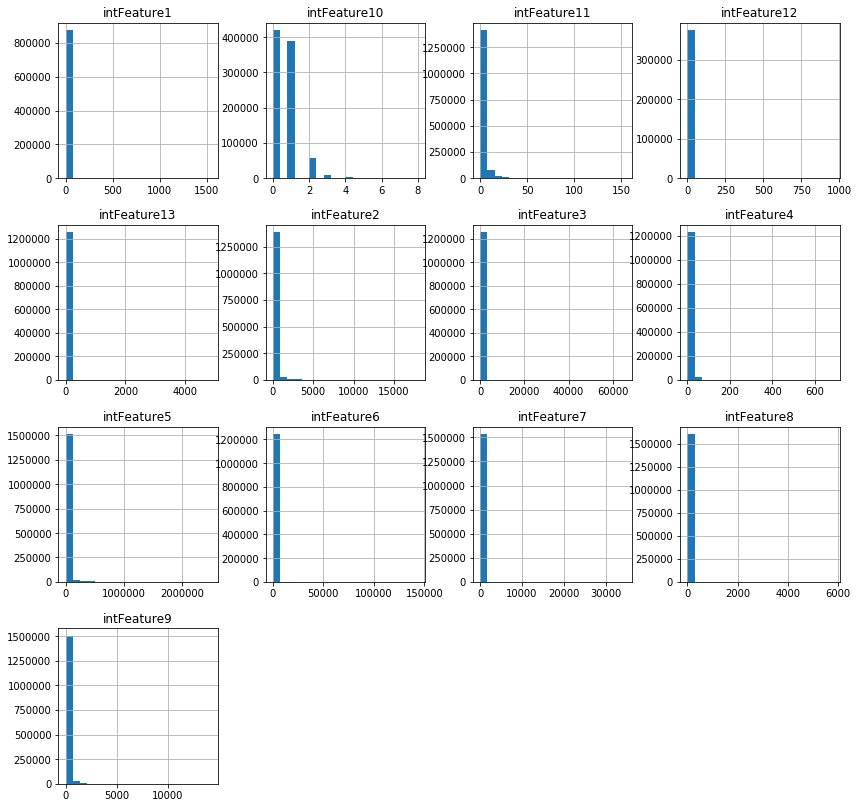

In [34]:
# CAN RUN IN LOCAL NODE

# transform to pandas DF to use histogram
intFields = ["intFeature"+str(i+1) for i in np.arange(13)]
toyTrainDF.select(intFields).toPandas().hist(figsize=(14,14), bins=20)
plt.show()

Observations:
1. Most features are highly right-skewed. We can minimize that problem using log transformations.
2. The features should be normalized so they all appear on the same scale.

Additionally, we can check for correlations between variables, once logistic regression models assume no multicolinearity and highly correlated variables can introduce bias in our predictions. To do both feature transformations and correlations calculation at the same time, we can use a scatterplot matrix:

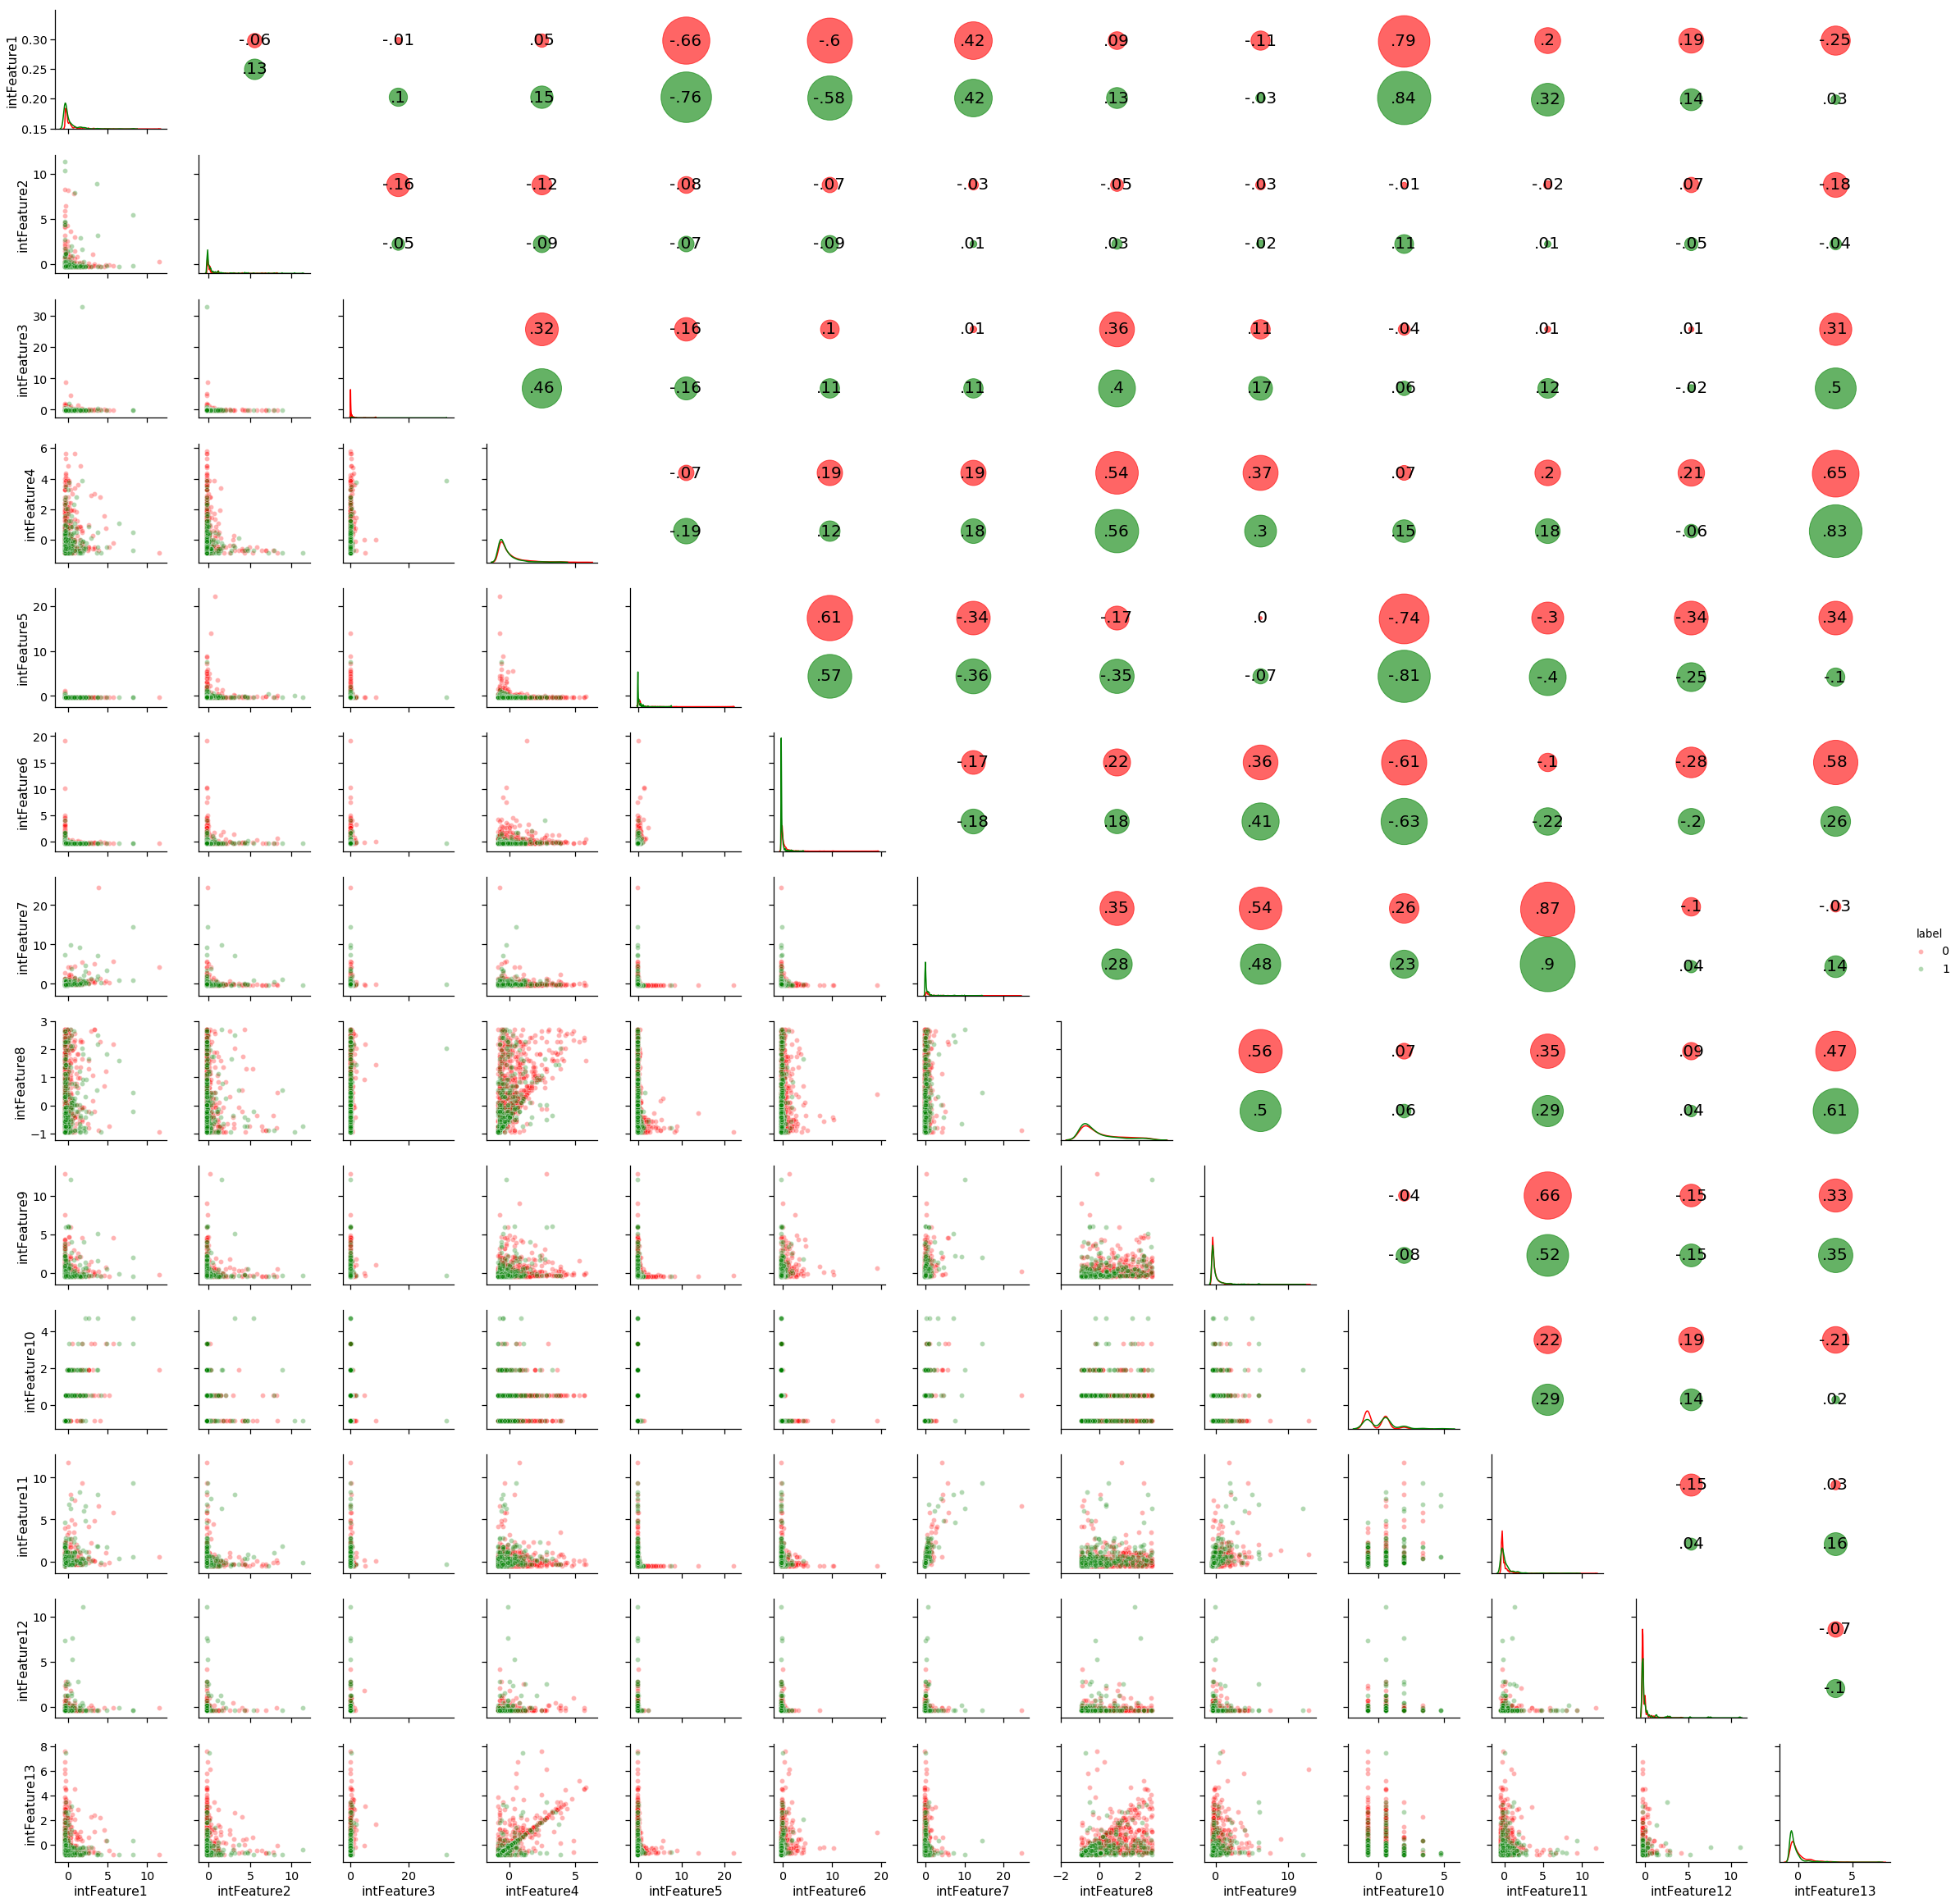

In [38]:
# CAN BE RUN IN LOCAL NODE

def corrdot(*args, **kwargs):
    """
    Helper function to plot correlation indexes in the upper side of the scatterplot matrix.
    Reference: https://github.com/mwaskom/seaborn/issues/1444
    """
    corr_r = args[0].corr(args[1], 'spearman')
    # Axes
    ax = plt.gca()
    ax.axis('off')
    x_min, x_max = ax.get_xlim()
    x_centroid = x_min + (x_max - x_min) / 2
    y_min, y_max = ax.get_ylim()
    y_true = y_max - (y_max - y_min) / 4
    y_false = y_min + (y_max - y_min) / 4
    # Plot args
    if kwargs['click'] == True:
        marker_size = abs(corr_r) * 5000
        ax.scatter(x_centroid, y_true, marker='o', s=marker_size, alpha=0.6, c='red')
        corr_text = str(round(corr_r, 2)).replace('-0', '-').lstrip('0')
        ax.annotate(corr_text, [x_centroid, y_true,], ha='center', va='center', fontsize=20)
    else:
        marker_size = abs(corr_r) * 5000
        ax.scatter(x_centroid, y_false, marker='o', s=marker_size, alpha=0.6, c='green')
        corr_text = str(round(corr_r, 2)).replace('-0', '-').lstrip('0')
        ax.annotate(corr_text, [x_centroid, y_false,], ha='center', va='center', fontsize=20)

# re-sampling the DF for better visualization:
vizDF = toyTrainDF.sample(False, 0.001, 2019).toPandas().iloc[:,0:14]

# define helper function to log-tranform:
def log_transform(x):
    '''shifts x up by one to account for presence of 0 values'
    and assumes negative values should be NaN'''
    return np.log(x + 1)

# log transform and normalize the DF, keeping the label column and using (VALUE - MEAN/STDDEV)
vizDF_norm = pd.DataFrame(vizDF[intFields].values, columns=intFields, index=vizDF.index)
vizDF_norm.apply(log_transform)
vizDF_norm = (vizDF_norm - vizDF_norm.mean())/vizDF_norm.std()
vizDF[intFields] = vizDF_norm

# ploting the results splited by label:
sns.set_context('notebook', font_scale=1.3)
g = sns.PairGrid(vizDF, vars=intFields, hue='click', palette={True:'green', False:'red'})
g.map_lower(sns.scatterplot, alpha=0.3)
g.map_diag(sns.distplot, hist=False)
g.map_upper(corrdot)
g.add_legend()


Observations:
1. We consider highly correlated features where Pearson's index is higher than 0.8. The following features shows strong correlations:
    * `intFeature1` and `intFeature10`
    * `intFeature4` and `intFeature13`
    * `intFeature5` and `intFeature10`
    * `intFeature7` and `intFeature11`
2. We can reduce multicolinearity dropping features 10, 11 and 13.

In [9]:
# CAN RUN IN LOCAL NODE

# adding features to drop list:
features_to_drop = features_to_drop + ['intFeature10', 'intFeature11', 'intFeature13']

Finally, we want to replace null values with the mean for each feature, making sure our dataset is complete. The absence of values would make our regression algorithm ignore non-complete rows, drastically reducing our training dataset.

#### 3.3.2 Exploring the categorical features:

As instated before, we don't have any clue about the semantic value of the categorical features, so our analysis will be based solely on data completion and distribution. First let's take a look if missing data means less probability of a click:

In [14]:
# CAN RUN IN LOCAL NODE

# checking the average Null count in each row:
toyTrainPandasDF = toyTrainDF.toPandas()
countNullDF = toyTrainPandasDF.isnull().sum(axis=1).rename('CountNaN')
countNullDF.describe()

count    1.603427e+06
mean     5.547028e+00
std      3.426217e+00
min      0.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      8.000000e+00
max      2.400000e+01
Name: CountNaN, dtype: float64

In [16]:
# CAN RUN IN LOCAL NODE

# concat dataframes
countNullDF = pd.concat([toyTrainPandasDF['click'], countNullDF], axis=1)
countNullDF.groupby('click').mean()

,CountNaN
click,
0,5.643954
1,5.265404


We see no rows with only null values (but we actually can't guarantee that for the full dataset), while the average missing count is around 5. Also we note a difference in null count for clicked and non-clicked add, however the difference can be considered neglegible.

Now, let's consider the distribution of the categorical columns:

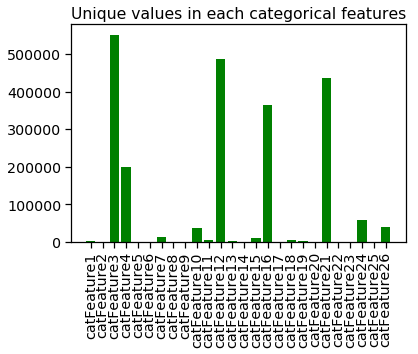

In [49]:
# CAN RUN IN LOCAL NODE

catFields = ["catFeature"+str(i+1) for i in np.arange(26)]

uniqueCounts = {}
for field in catFields:
    uniqueCounts[field] = toyTrainDF.select(field).distinct().count()
plt.bar(uniqueCounts.keys(), uniqueCounts.values(), color='g')
plt.title("Unique values in each categorical features")
plt.xticks(rotation=90)
plt.show()

Observation:
Some categorical variables (such as catFeature3) have a large number of unique values. They should be binned using some techniques. 
<br>(a) They can be binned based on frequency.
<br>(b) They can be binned based on average value of the outcome variable.

For a better understand of each feature, we can take a look on its main values and value count:

In [57]:
# CAN RUN IN LOCAL NODE

def descCatEDA(dataframe, column, totalCount=0, nanThreshold=0.5):
    """
    Function that prints an analysis of column from the given dataframe. Retuns None.
    Args:
        dataframe    - input dataframe
        column       - string with a dataframe column.
        totalCount   - optional. Number of rows in the dataframe (if defined avoid recalculation).
        nanThreshold - optional. Percentage allowed of NaN values in the column.
    Returns:
        Column       - name of the column if the column have more NaN if it represents more 
                       than nanThreshold ratio.
    Output:
        NaN Count    - number for NaN values in % of the row count of the dataframe.
        Most Freq    - number of values for the 5 most frequent values (discarding NaN).
        
    """
    if totalCount == 0:
        totalCount = dataframe.count()
    
    pandCol = dataframe.select(column).toPandas()[column]
    freqNumbers = dict(pandCol.value_counts(normalize=True).head(5))
    
    nanCount = dataframe.filter(dataframe[column].isNull()).count()
    
    validCount = totalCount - nanCount
    
    print('+'+13*'-'+'+'+22*'-'+'+')
    print('| {:^4}'.format(column)+' |{:>14}{:>6.2f}% |'.format('Null Count: ', nanCount/totalCount*100))
    print('+'+13*'-'+'+'+22*'-'+'+')
    print('| Unique Values: {:>19} |'.format(pandCol.nunique()))
    print('+'+13*'-'+'+'+22*'-'+'+')
    for item in freqNumbers:
        print('|{:>12} |{:>20.2f}% |'.format(item, freqNumbers[item]*100))
    print('+'+13*'-'+'+'+22*'-'+'+\n')
    
    if nanCount/totalCount*100 > nanTreshold*100:
        return column
    else:
        return None

In [58]:
# CAN RUN IN LOCAL NODE

badFeatures = []
nanTreshold = 0.75

for item in catFields:
    badFeatures.append(descCatEDA(toyTrainDF, item, totalCount, nanTreshold))

badFeatures = list(filter(None,badFeatures))
print('List of catFeatures with more than {:4.2f}% NaN ratio: {}'.format(nanTreshold*100, badFeatures))

+-------------+----------------------+
| catFeature1 |  Null Count:   0.00% |
+-------------+----------------------+
| Unique Values:                1377 |
+-------------+----------------------+
|    05db9164 |               50.07% |
|    68fd1e64 |               16.66% |
|    5a9ed9b0 |                8.35% |
|    8cf07265 |                4.93% |
|    be589b51 |                3.29% |
+-------------+----------------------+

+-------------+----------------------+
| catFeature2 |  Null Count:   0.00% |
+-------------+----------------------+
| Unique Values:                 552 |
+-------------+----------------------+
|    38a947a1 |               11.47% |
|    207b2d81 |                4.31% |
|    38d50e09 |                3.85% |
|    1cfdf714 |                3.63% |
|    287130e0 |                3.54% |
+-------------+----------------------+

+-------------+----------------------+
| catFeature3 |  Null Count:   3.41% |
+-------------+----------------------+
| Unique Values:       

+-------------+----------------------+
| catFeature21 |  Null Count:   3.41% |
+-------------+----------------------+
| Unique Values:              435601 |
+-------------+----------------------+
|    0014c32a |                2.56% |
|    723b4dfd |                2.25% |
|    e587c466 |                1.12% |
|    5f957280 |                1.01% |
|    0429f84b |                1.01% |
+-------------+----------------------+

+-------------+----------------------+
| catFeature22 |  Null Count:  76.25% |
+-------------+----------------------+
| Unique Values:                  15 |
+-------------+----------------------+
|    ad3062eb |               57.46% |
|    c9d4222a |               35.29% |
|    78e2e389 |                3.05% |
|    8ec974f4 |                2.27% |
|    c0061c6d |                1.69% |
+-------------+----------------------+

+-------------+----------------------+
| catFeature23 |  Null Count:   0.00% |
+-------------+----------------------+
| Unique Values:    

Observations:
1. Some features have a high number of missing data (such as `catFeature22`, missing more than 75% of the values). With this result we can set a threshold to drop features.
2. Similarly to what happened with the integer features, some are highly skewed, with up to 90% of the valid values in one category. 

In [10]:
# CAN RUN IN LOCAL NODE

# adding features to drop list:
features_to_drop.append('catFeature22')

Additionally, in order to apply the Logistic Regression model into our data, we want to one-hot-encode our levels. However, depending on the number of unique elements in our features, this approach can generate a high number of features, for example:

In [60]:
# CAN RUN IN LOCAL NODE

uniqueCounts = {}
for field in catFields:
    uniqueCounts[field] = toyTrainDF.select(field).distinct().count()
uniqueCounts

{'catFeature1': 1377,
 'catFeature2': 552,
 'catFeature3': 551268,
 'catFeature4': 199164,
 'catFeature5': 288,
 'catFeature6': 16,
 'catFeature7': 11543,
 'catFeature8': 606,
 'catFeature9': 3,
 'catFeature10': 37464,
 'catFeature11': 5010,
 'catFeature12': 487308,
 'catFeature13': 3159,
 'catFeature14': 26,
 'catFeature15': 10358,
 'catFeature16': 365039,
 'catFeature17': 10,
 'catFeature18': 4328,
 'catFeature19': 1923,
 'catFeature20': 4,
 'catFeature21': 435602,
 'catFeature22': 16,
 'catFeature23': 15,
 'catFeature24': 57547,
 'catFeature25': 78,
 'catFeature26': 40474}

In [61]:
# CAN RUN IN LOCAL NODE

avg_levels = sum(uniqueCounts.values())/len(uniqueCounts.values())
avg_levels

85122.231

In this case, we can have $26 \cdot 85122 = 2,213,172$ in a higly sparse dataset. Based on our toy datset we will have more features than rows, ending in problems with the curse of dimensionality. The way we found to overcome this problem was to work with bins for rare leves. Hopefully, with the skeweness of our data, this technique will drastically reduce the model dimesionality.

Finally, because of the lack of semantic meaning of categorical data, the absence of data may also mean something for our model, so we want to add missing values on categorical data to its own bin, creating bins of `missing_value` for each categorical feature.

After all the previous consideration about our data, we are ready to start transforming our dataset and implementing the Binary Logistic Regression to predict click-through-rate.

## 4. Algorithm Implementation

### 4.1 Data preparation:
From the previous sections we derived the following tranformations for our dataset:
1. Drop `intFeature12`.
2. Set negative numbers in `intFeature2` to `null`.
3. Replace `null` values with the feature mean for the numerical features.
4. Apply a log-tranformation and normalized all numeric features.
5. Drop features `intFeature10`, `intFeature11`, and `intFeature13`.
6. Drop feature `catFeature22`.
7. Create bins `rare-levels` for levels with less than 30 occurencies on categorical features.
8. Create bins `missing_values` for categorical data. 

Additionally we will adress more common data tranformation, like deleting duplicated rows and rows missing more than 75% of the features. Let's starting defining a function to transform our dataframe (we will use now for the train data, and later for the test data):

In [12]:
# as `features_to_drop` was generated in local mode, use this to recreate the list:
features_to_drop = ['intFeature12','intFeature10','intFeature11','intFeature13','catFeature22']

# as we use the udf created in our local node, use this to redefine it:
replace_negatives = functions.udf(lambda x: None if x < 0 else x, IntegerType())

In [13]:
def df_transform(df, features_to_drop, feature_threshold):
    '''
    Function to apply all tranformations described in EDA section:
        1. Drop features_to_drop.
        2. Set negative numbers in `intFeature2` to `null`.
        3. Fill null with mean() in numerical features
        4. Apply a log-tranformation and normalize all numeric features.
        5. Create bins `rare-levels` for levels with less than 30 occurencies on categorical features.
        6. Create bins `missing_values` for categorical data.
    Args:
        df                : pyspark dataframe containing all features 
        features_to_drop  : features identified to be dropped
        feature_threshold : features with less observations than this will be
                            converted to 'feature_name-rare'
        intFields         : list with names of numerical features (log transform and normalization)
        catFields         : list with names of categorical features (for binning rare and missing values)
    Returns:
        transformed_DF    : pyspark dataframe with the same form, but with transformed features.
    '''
    
    # Cleaning duplicate and missing more than 75% of the features:
    dedupedDF = df.dropDuplicates()
    print('Droped {} duplicated rows.'.format(df.count() - dedupedDF.count()))
    cleanDF = dedupedDF.dropna(thresh=30)
    print('Droped {} incomplete rows.'.format(dedupedDF.count() - cleanDF.count()))

    # Drop bad features (see EDA section):
    cleanDF = cleanDF.drop(*features_to_drop)
    
    # get the column names after droping features:
    intFields = [i for i in cleanDF.columns if 'int' in i]
    catFields = [i for i in cleanDF.columns if 'cat' in i]

    # Setting intFeature2 values to null (see EDA section for udf definition)
    cleanDF = cleanDF.withColumn('intFeature2', replace_negatives(cleanDF.intFeature2))
    
    # create a means dictionary to use in fill.na:
    mean_dict = {}
    
    # iterating through numerical features
    for i in intFields:
    #compute mean for each column
        col_mean = cleanDF.select(functions.mean(functions.col(i)).alias('mean')).collect()[0]['mean']
        mean_dict[i] = col_mean
    
    cleanDF = cleanDF.na.fill(mean_dict)
    
    # normalizing the features:
    for i in intFields:
    # compute mean for each column
        col_mean = cleanDF.select(functions.mean(functions.col(i)).alias('mean')).collect()[0]['mean']
        col_std = cleanDF.select(functions.stddev(functions.col(i)).alias('std')).collect()[0]['std']
        #update dataframe
        cleanDF = cleanDF.withColumn(i,(functions.col(i) - col_mean)/col_std)
    
    # Creating new columns with bins for "rare levels" and "missing values"
    for feature in catFields:
        bucket = set(cleanDF.groupBy(feature) \
                        .count() \
                        .filter(functions.col('count') > 30) \
                        .select(functions.col(feature)) \
                        .rdd \
                        .map(lambda x: x[0]) \
                        .collect())
    
        # update dataframe with rare values (fewer than 30) as their own bucketed value
        cleanDF = cleanDF.withColumn(feature, functions.when(functions.col(feature).isin(bucket), 
                                                   functions.col(feature)).otherwise(feature+'-rare'))
        
        # fill the missing values with with the bin name
        cleanDF = cleanDF.na.fill(feature + '-NaN', subset=feature)

    
    return cleanDF

In [14]:
# let's time our code to have a sense how long it is taking to pre-process the data:
start = time.time()

binnedDF = df_transform(df_full, features_to_drop, 30)
timeCount = time.time() - start

print('... Full dataset preprocessed in {} seconds.'.format(timeCount))

# droping the cached dataset and caching the new one
df_full.unpersist()
binnedDF.cache()

Droped 10651 duplicated rows.
Droped 3950455 incomplete rows.
... Full dataset preprocessed in 4438.735630989075 seconds.


DataFrame[click: int, intFeature1: double, intFeature2: double, intFeature3: double, intFeature4: double, intFeature5: double, intFeature6: double, intFeature7: double, intFeature8: double, intFeature9: double, catFeature1: string, catFeature2: string, catFeature3: string, catFeature4: string, catFeature5: string, catFeature6: string, catFeature7: string, catFeature8: string, catFeature9: string, catFeature10: string, catFeature11: string, catFeature12: string, catFeature13: string, catFeature14: string, catFeature15: string, catFeature16: string, catFeature17: string, catFeature18: string, catFeature19: string, catFeature20: string, catFeature21: string, catFeature23: string, catFeature24: string, catFeature25: string, catFeature26: string]

At this point, it is also benefitial to store our tranformed dataset so we can have a checkpoint and restore our work if needed. For that, we will use a parquet file again:

In [15]:
# Comment/Uncomment only one of this cells to write/read the processed DF from google storage:

binnedDF.write.parquet("gs://w261_final-project_team13/fullDF_preprocessed.txt")
# binnedDF = spark.read.parquet("gs://w261_final-project_team13/fullDF_preprocessed.txt")

Finally, we can see our data cleaned, normalized and ready to be ingested by our model.

In [17]:
# showing the 5 first rows for a sanity check:
binnedDF.select(binnedDF.columns[:6]).show(5)
binnedDF.select(binnedDF.columns[7:12]).show(5)
binnedDF.select(binnedDF.columns[13:19]).show(5)
binnedDF.select(binnedDF.columns[20:26]).show(5)
binnedDF.select(binnedDF.columns[27:33]).show(5)
binnedDF.select(binnedDF.columns[34:]).show(5)

+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
|click|         intFeature1|         intFeature2|         intFeature3|         intFeature4|         intFeature5|
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
|    0|-0.45906996863551086| -0.2705813462114749| 0.03671347858943969|-0.28927765692267365|  -0.226532357711775|
|    1|  0.5153776892822588|-0.26025628704547576|  0.8853857938316968|  1.8325994541639543| -0.2557887458143535|
|    1|-0.04144954381360...|-0.29897525891797255|-0.07209066439033686|  -0.788542859531292| -0.2335336157200802|
|    0|-0.45906996863551086|-0.00212980789549702|0.004072235695506729|-0.16446135627051903|-0.21393959726697262|
|    0|-0.45906996863551086|-0.29639399412647277| -0.0612102500923592|-0.03964505561836445|-0.05086730949434342|
+-----+--------------------+--------------------+--------------------+--------------------+-----

### 4.2 Model Training

For the model training itself, we decided to go with the PySpark ML library, that is based on PySpark DataFrames, and allows users to quick assembly and configure practical machine learning pipelines. For reference on how the algorithm works, see section 2: Algorithm Explanation.

In a high level, we will take the pre-processed dataset and set a pipeline, a high-level API that allows us to set transformations and estimations to our dataset (pretty much like transformations and actions in RDDs). Note that we could add the `df_transform` function to this pipeline and have a pipeline that could ingest raw data and output predictions. We chose to have our data preparation outside of the pipeline for clarity purposes, however, if this model eventually goes into production, we would add all the data transformations required. For this model, the stages of the pipeline need to be:

1. Create numerical indexers to our categorical features.
2. One-hot-encode using the indexers.
3. Create a multiple column vector.
4. Set a pipeline to automatize the previous three tranformations
4. Split our dataset into training and testing dataframes.
5. Train the model using the train data.
6. Fit the test data and output the results.

In [20]:
# reading the column names (they changed during the pre-processing phase)
intFields = [i for i in binnedDF.columns if 'int' in i]
catFields = [i for i in binnedDF.columns if 'cat' in i]

# Transform categorical values in numerical indexes:
indexers = [StringIndexer(inputCol=c, outputCol='{0}_indexed'.format(c)) for c in catFields]
label = StringIndexer(inputCol='click', outputCol='label')

In [21]:
# implement one-hot-encoding categorical features to reduce dimensionality for model training:
encoder = OneHotEncoderEstimator(
    inputCols=[indexer.getOutputCol() for indexer in indexers],
    outputCols=["{0}_encoded".format(indexer.getOutputCol()) for indexer in indexers],
    dropLast=False)

# combining all the feature columns into a single vector column
assembler = VectorAssembler(inputCols= encoder.getOutputCols() + intFields,
                            outputCol= "features")

# adding a time counter for checking the training time:
start = time.time()

# defining the pipeline that will index the catFeatures, tranform all features ina vector and bring back the labels:
pipeline = Pipeline(stages = indexers + [encoder, assembler, label])

# apply the pipeline to the full dataset
processedDF = pipeline.fit(binnedDF).transform(binnedDF)
dataset = processedDF.select('label','features')

# spliting our ready-to-consume dataset in train and test data:
train, test = dataset.randomSplit([0.7,0.3], seed=2019)

# Create an instance of our model and fit the training data
lr = LogisticRegression(maxIter=10)
lr_model = lr.fit(train)

# Check training time:
trainTime = time.time()
print('... Model trained in {0} seconds'.format(trainTime - start))

# making predictions on test data and check its time counter:
predictions = lr_model.transform(test)
print('... Predictions made in {0} seconds'.format(time.time() - trainTime))

... Model trained in 528.844703912735 seconds
... Predictions made in 0.017261505126953125 seconds


Our predictions are ready! We can take a look on some of them:

In [30]:
predictions.select('label','prediction').describe().show()
predictions.select('label', 'prediction', 'probability').show(20)

+-------+-------------------+-------------------+
|summary|              label|         prediction|
+-------+-------------------+-------------------+
|  count|           12563455|           12563455|
|   mean|0.25858157648513086|0.12508000386836265|
| stddev|0.43785518159261594| 0.3308096207960631|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       0.0|[0.53955726793911...|
|  0.0|       0.0|[0.58878684031028...|
|  0.0|       0.0|[0.57554087521907...|
|  0.0|       0.0|[0.59028387376181...|
|  0.0|       0.0|[0.67967183250981...|
|  0.0|       0.0|[0.54123039459767...|
|  0.0|       0.0|[0.61253679897914...|
|  0.0|       1.0|[0.32645694369665...|
|  0.0|       1.0|[0.49548674451012...|
|  0.0|       1.0|[0.48974500506562...|
|  0.0|       0.0|[0.62100677

We see that the mean of the predicted column is lower than the true labels, which indicates a lot of false negatives (in despite of our first 20 rows analisys). For this reason, we need an error metric to better check the quqality of our model. Based on the original Kaggle competition, we decided to use the `log-loss` function, which unfortunatelly is not defined in PySpark. To implement that function we can do:

In [23]:
# extracting true,predicted and probability to compute log loss 
selected = predictions.select('label', 'prediction', 'probability')

# evaluation of logit fit with logLoss
# we want to extract the probability of a click which is the first element in the probability column
# so we need a user defined function to manipulate columns of array types
firstelement = functions.udf(lambda v: float(v[1]), FloatType())

# pyspark implementation for logLoss
pyspark_mod = selected.withColumn('logloss', -functions.col('label') * functions.log(firstelement(functions.col('probability'))) - (1.-functions.col('label'))*functions.log(1-firstelement(functions.col('probability'))))

ll = pyspark_mod.agg(functions.mean('logloss').alias('ll')).collect()[0]['ll']

# print the resulting log-loss
print("The log loss from our logistic regression model is: " + str(ll))

The log loss from our logistic regression model is: 0.47759315586299


With this metric, we can compare our results with the original competition leaderboard. With the current model, we would end-up in 341st place, or in the top 47.5%. In order to improve that we can start an iterative quest for better feature enfineering technique and model parameters, that is not the scope of this work. 

## 5. Application of Course Concepts

### 5.1 Baseline

__Zero-Information baseline:__

The most basic baseline would be to assume that every ad has equal probability of being clicked, which is equal to the globally observed click through rate.  While in practice this would never be employed, it represents the level which can be achieved without any customization, and therefore is effective in helping to understand the value proposition of any analytical solution, including machine learning.  Since CTR is generally small, we will most likely always end up predicting the majority class, “did not click”.

__Empirical-Bayes:__

Our Empirical-Bayes baseline is a level above the “zero-information” approach, and represents the best we can do without taking interaction effects into consideration (e.g. how a user’s features influence click probability conditional on the fact that it is this specific ad).  Under this framework we adjust the global user CTR using Empirical-Bayes to predict a user’s CTR, as well as adjust the global ad CTR to predict an ad’s CTR.  These values can then be used to estimate the probability that user will click on that ad.  We point the reader to an intuitive explanation of empirical bayes by David Robinson if they are unfamiliar with this topic (Robinson).

From our perspective, our model is “practically useful” if it outperforms our Empirical-Bayes baseline, as that would indicate that taking into account specific features has improved performance vis a vis predicting results by extrapolating historical occurences of the metric in question.


### 5.2 Gradient Descent (Convex Optimization): 

Convex optimization has the beautiful property that we are guaranteed to find the global minimum, as opposed to a local minimum, and therefore can be assured that given a dataset and model structure we achieve the best possible result.  We chose logistic regression as our model, whose loss function and gradient are:

$$J(\theta) = {1 \over_m} \cdot (-y^Tlog(h) - (1-y)^Tlog(1-h)) $$
$$\delta J(\theta) = {1 \over m} X^T (f(X\theta)-y)$$
$$h = f(X\theta)$$
Where f(x) is sigmoid function

Since cross entropy is convex we can be assured our result is a global minimum.

__SGD vs. Batch:__
    
SGD allows us to make significantly more gradient updates per epoch, with the caveat that we might make some changes in the wrong direction, as our gradient is being derived from a single training example.  However, in aggregate these missteps should be irrelevant and the model should converge.  With batch, we use the entire dataset to calculate the gradient, meaning we have to pass over all the data a significant number of times.  Mini-batch strikes a balance between the two, and uses a batch size greater than 1, but much smaller than the size of the dataset.  For our implementation we selected mini-batch, as this allows us to speed up the rate of convergence, while minimizing the risk of a gradient update moving the model in the wrong direction.

### 5.3 Data Normalization:

While some machine learning methods are robust against variables having different scale, or distribution (e.g. Tree based methods), logistic regression benefits from the normalization of data, and is absolutely necessary if regularization will be used.  There are many ways to normalize data, such as min-max scaling, which maps every feature to be between 0 and 1, as well as Z-score standardization, which transforms the distribution to be ~N(0,1).  In our project we choose to employ Z-score standardization to better handle outliers, which we observed in our EDA.   

### 5.4 One hot encoding, model complexity, and dimensionality reduction:

Logistic regression is not capable of handling categorical variables, and therefore we had to determine how to transform our 26 categorical variables into numerical values.  One common approach is “one-hot encoding” which involves taking a single categorical variable, and expanding it to n-1 features, where n is the number of unique values in the category; each new feature is a binary indicator for one of the n features.  While at first glance handling 26 categorical variables seems trivial, upon further inspection there is a significant challenge: some categorical variables have tens of thousands of unique values!  If we were to implement “one-hot-encoding” without any additional considerations we would end up with hundreds of thousands of features, many of which would be very sparse.  Including that quantity of features would make the model completely intractable from the perspective of identifying key factors, and would increase the necessary training data to have accurate parameter estimates by several orders of magnitude.  In an effort to avoid these problems we took the following actions: 1) one-hot-encode any category with at least 30 observations in the training data, and map anything else to a special `rare` bucket; additionally, we map all missing values to a special `_NaN` bucket.  This approach ensures we keep the features which are most likely to actually impact a prediction, while avoiding the “curse of dimensionality”.  This approach represents a manual, rule-based approached to dimensionality reduction.  It is worth noting that we could have opted for a raw implementation of one-hot-encoding and then used principal component analysis to reduce dimensionality.

### 5.5 Regularization \& Overfitting:

One common problem in machine learning is that of overfitting, where a trained model performs poorly on out of sample tests, as it has “memorized” the training data rather than learned generalizable patterns.  While some models are particularly susceptible to this issue (e.g. LSTMs), it is almost always a concern data scientists should be wary of.  Within neural models, “dropout” is commonly used to avoid overfitting, which is a similar concept to that of excluding certain features randomly within a particular tree in a random forest.  In both linear and logistic regression these options aren’t available to us, so instead we turn to “regularization”.  Regularization involves adding a penalty term to the loss function which increases as parameter weights increase.  This forces the model to avoid large parameter values, unless the added predictive value is large.  There are two main types of regularization, L1 and L2, whose formulas are as follows:

$$L_1 = \lambda \Sigma_{j=1}^m |\beta_j|$$
$$L_2 = \lambda \Sigma_{j=1}^m \beta_j^2$$

L1 is commonly associated with Lasso regression, while L2 is associated with Hinge; for our project we made use of L2.  To evaluate the impact of regularization we trained our model both with and without our regularization term, and compared our results on our withheld test set.  Somewhat surprisingly, the results were nearly identical.  It’s possible that given the size of our feature set, no one variable was being overfit even without regularization.

### 5.6 MapReduce Paradigm:

The majority of algorithms which are implemented at scale make use of the MapReduce paradigm, and logistic regression is no different.  To calculate our gradients we first need to make predictions for our training examples, each of which will be accomplished with a map function; presumably we will also be broadcasting the current value of Theta, our parameter vector.  We can then calculate the gradient per training example before reducing to arrive at our final update.  By finding ways to complete work in parallel we are able to drastically speed up the process of training/optimizing a model.


## 6. Bibliography

[Wikipedia - Online Advertising](https://en.wikipedia.org/wiki/Online_advertising)

[Chapelle, Olivier, et al. “Simple and Scalable Response Prediction for Display Advertising.” ACM Transactions on Intelligent Systems and Technology](https://www.dropbox.com/s/s4x7wp8gjsh021d/TISTRespPredAds-Chappelle-CTR-Prediction-2014Paper.pdf?dl+=0)

[He, Xinran, et al. “Practical Lessons from Predicting Clicks on Ads at Facebook.” Proceedings of 20th ACM SIGKDD Conference on Knowledge Discovery and Data Mining](https://research.fb.com/publications/practical-lessons-from-predicting-clicks-on-ads-at-facebook/)

[Robinson, David. “Understanding Empirical Bayes Estimation (Using Baseball Statistics).” Variance Explained](varianceexplained.org/r/empirical_bayes_baseball/)

[Nagpal, Anuja. “Logistic Regression from Scratch in Python.” Medium, Medium, 23 Feb. 2018](medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac)
